<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:dodgerblue;letter-spacing:1px;overflow:hidden"><b> KYPHOSIS DATASET</b></div>

<p style="text-align: center"><font color='Magenta'> <b>DS-4</b><font color='black'><p>
    
<p style="text-align: center;"><font color='dodgerblue'> <b>Data Analytics Final Project  | May 2024</b><font color='orange'><p>


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=dodgerblue> 🎯 Project Description:</font></h3>   
    
    
- In this project, we will perform basic Exploratory Data Analysis (EDA) on the Kyphosis disease Dataset. 
- Kyphosis is an abnormally excessive convex curvature of the spine,  and 
- the dataset provides information on children who have undergone corrective spinal surgery. 
    
<h3 align="left"><font color=dodgerblue> 📝 About the Dataset </font></h3>
    
- Dataset contains 81 rows and 4 columns representing data on children who have had corrective spinal surgery.
<br>    
- INPUTS: 
    1. **Age**: The age of the patient in months., 
    2. **Number**: The number of vertebrae involved in the surgery, 
    3. **Start**: The number of the first (top-most) vertebra operated on.
    4. **Kyphosis**: Indicates whether kyphosis was present (yes/no) after the operation. 

    <br>      
- OUTPUTS: Represents a factor with levels "absent" or "present," indicating if **kyphosis** (a type of deformation) was present after the operation.
    
<h3 align="left"><font color=dodgerblue> ✅ All Tasks </font></h3>
    
- Using the **“kyphosis.csv"** included in the course package, write a python script to perform the following tasks:

    **Understanding Data** 
    1. Import the “kyphosis.csv" file using Pandas
    2. Perform basic Exploratory Data Analysis (EDA) on the data       
    3. List the average, minimum and maximum age (in years) considered in this study using 2 methods
    
     **Preprocessing Data** 
    
    4. Convert the age column datatype from int64 to float64
    5. Define a function that converts age from months to years 
    6. Apply the function to the “Age” column and add the results into a new column entitled “Age in Years” 
    
     **Feature Relationships** 
    
    7. Plot the correlation matrix 
    8. What are the features of the oldest and youngest child in this study?
    9. Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check.    
    10. Normalization is conducted on the 'Age' column to make feature values range from 0 to 1.

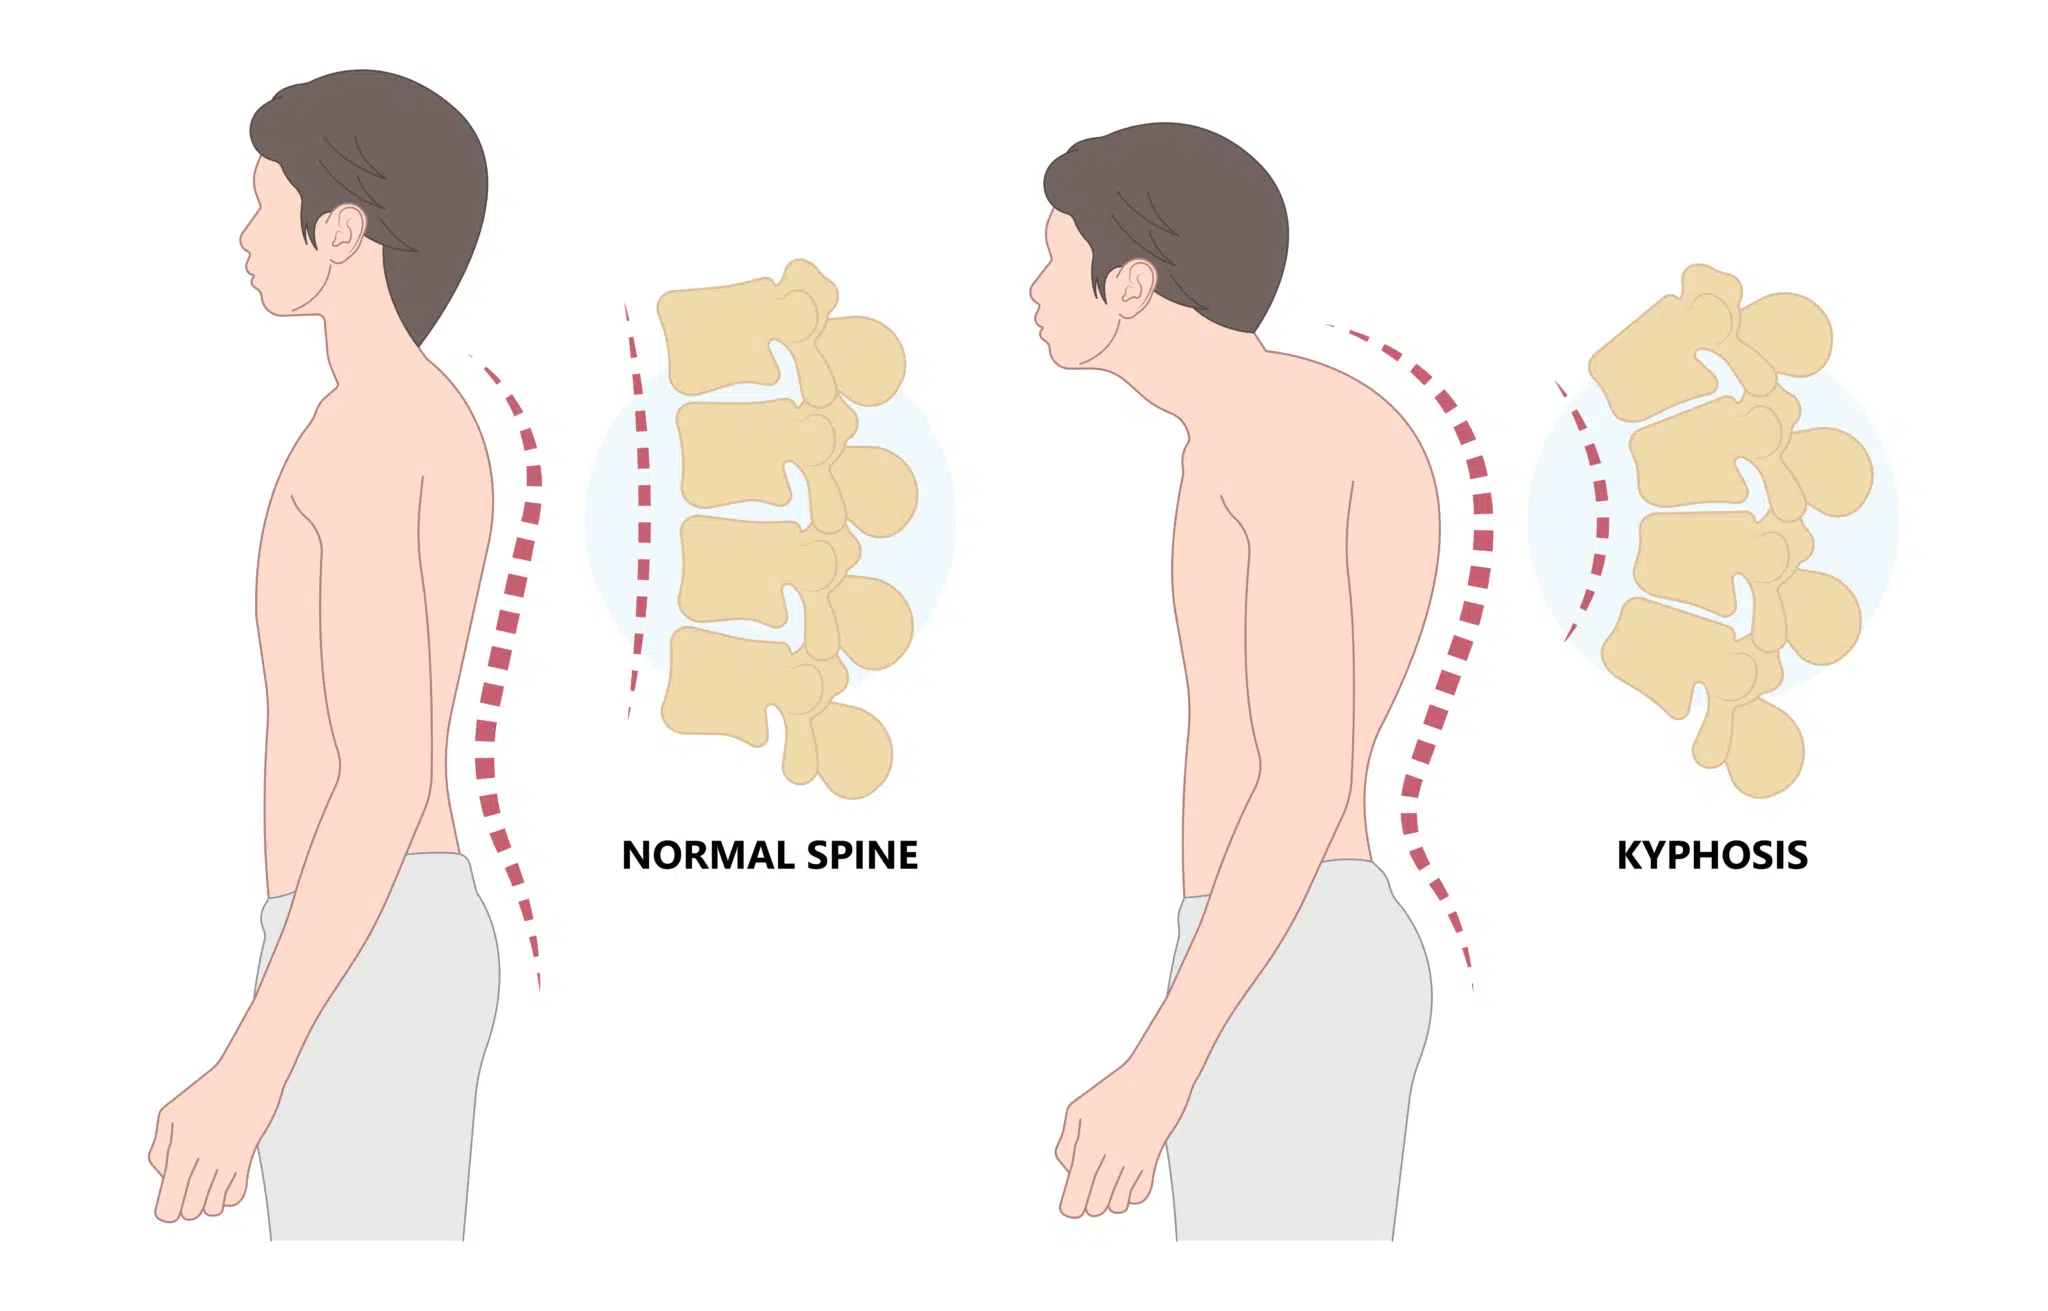

<h3 align="left"><font color=dodgerblue>🔬 Getting to Know About Anatomy of Vertebrea  </font></h3>

**Anatomic Vertebrea Groups**

1. **Cervical Spine (C1-C7)** (Boyun)
- Number of Vertebrea: 7

2. **Thoracic Spine (T1-T12)** (Sırt)
- Number of Vertebrea: 12

3. **Lumbar Spine (L1-L5)** (Bel)
- Number of Vertebrea: 5

4. **Sacrum (S1-S5, fused)** (Kuyruk)
- Number of Vertebrea: 5

5. **Coccyx (Co1-Co4, fused)** (Kuyruk)
- Number of Vertebrea: 4

These groups represent the different sections of the vertebral column, with each section containing a specific number of vertebrae.


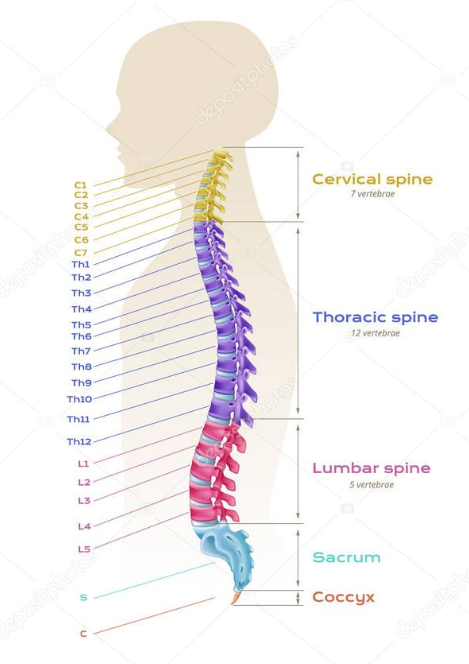

<h3 align="left"><font color=dodgerblue> ✨ Classifying the 'Start' column to Anatomic Vertebrea Groups </font></h3>

In this Dataset; **Start** column is the **first** (top-most) vertebra number operated on and containes the numbers between (1-18).

- We categorized the vertebra numbers in the Start column into Anatomical groups, and
- new column 'VertebraGroup'  is created to classify the values in the Start column.

**Vertebrea Groups for the 'Start' column**
- 1-7: Cervical (C1-C7) (boyun)
- 8-19: Thoracic (T1-T12) (sirt)
- 20-24: Lumbar (L1-L5) (bel)
- 25-29: Sacrum (S1-S5) (kuyruk)


<br>

- We labeled each group of vertebreas with a number and created new column called 'VertebraGroupNumber'.

**Labels of the Vertebrea Groups**
- (1) Cervical (C1-C7)
- (2) Thoracic (T1-T12)
- (3) Lumbar (L1-L5)
- (4) Sacrum (S1-S5)
- (5) Unknown or other


## <font color=#2865c8> <b> UNDERSTANDING THE DATA </b><font color='orange'>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [50]:
#Import the “kyphosis.csv" file using Pandas
df0 = pd.read_csv('kyphosis.csv')
df = df0.copy()

### <font color='dodgerblue'> <b> Perform Basic Statistical Data Analysis </b><font color='orange'>

In [30]:
df.shape

(81, 4)

In [51]:
df.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

In [52]:
#Show the first couple of rows using .head()
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [53]:
#Show the last couple of rows using .tail()
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [54]:
#features in dataset
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [55]:
# Obtain a Statistical Summary about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


In [57]:
df.describe(include="object").T

,count,unique,top,freq
Kyphosis,81,2,absent,64


In [58]:
#Check the duplicated data if exists
df.duplicated().sum()

0

##  <font color=#2865c8> <b> DATA PREPROCESSING </b><font color='black'> 

<font color='dodgerblue'> ✅ All Tasks</font>

- Using the **“kyphosis.csv"** included in the course package, write a python script to perform the following tasks:

    **Understanding Data** 
    1. Import the “kyphosis.csv" file using Pandas
    2. Perform basic Exploratory Data Analysis (EDA) on the data       
    3. List the average, minimum and maximum age (in years) considered in this study using 2 methods


In [33]:
# List the average, minimum and maximum age (in years) considered in this study using 2 methods

import pandas as pd

# Convert the Age column to years (1 year = 12 months)
df['Age_in_years'] = df['Age'] / 12

# Calculate the average, minimum, and maximum  for age
average_age = df['Age_in_years'].mean()
minimum_age = df['Age_in_years'].min()
maximum_age = df['Age_in_years'].max()

print(f"Average Age: {average_age:.2f} years")
print(f"Minimum Age: {minimum_age:.2f} years")
print(f"Maximum Age: {maximum_age:.2f} years")


NameError: name 'df' is not defined

In [40]:
import numpy as np

#  Take the Age column as a NUMPY ARRAY and convert it to years
age_in_years = df['Age'].to_numpy() / 12

# Calculate the average, minimum, and maximum  for age
average_age_np = np.mean(age_in_years)
minimum_age_np = np.min(age_in_years)
maximum_age_np = np.max(age_in_years)

print(f"Average Age (Numpy): {average_age_np:.2f} years")
print(f"Minimum Age (Numpy): {minimum_age_np:.2f} years")
print(f"Maximum Age (Numpy): {maximum_age_np:.2f} years")


Average Age (Numpy): 6.97 years
Minimum Age (Numpy): 0.08 years
Maximum Age (Numpy): 17.17 years


### <font color='dodgerblue'> <b> Create new Features </b><font color='orange'>

In [60]:
#List the minimum and maximum values for Start columns

df.groupby('Start').agg([min,max])

Kyphosis           Age      Number     Age_in_years           
           min      max  min  max    min max          min        max
Start                                                               
1       absent  present    2  130      4   5     0.166667  10.833333
2       absent  present   15   18      5   7     1.250000   1.500000
3       absent  present  121  143      2   9    10.083333  11.916667
5       absent  present   71  128      3   6     5.916667  10.666667
6       absent  present    8  139      3  10     0.666667  11.583333
8      present  present  114  120      5   7     9.500000  10.000000
9       absent   absent    1   51      3   7     0.083333   4.250000
10      absent  present   17  206      3   5     1.416667  17.166667
11      absent   absent   18  140      2   5     1.500000  11.666667
12      absent  present    1  127      3   6     0.083333  10.583333
13      absent  present    2  175      2   7     0.166667  14.583333
14      absent  present   82  177      2   5     6.833333  14.750000
15      absent   absent    1  178      3   6     0.083333  14.833333
16      absent   absent    1  151      2   5     0.083333  12.583333
17      absent   absent    2  195      2   2     0.166667  16.250000
18      absent   absent  168  168      3   3    14.000000  14.000000

In [61]:
# Function to classify vertebra into Anatomic groups

def classify_vertebra(start):
    if 1 <= start <= 7:
        return 'Cervical (Boyun)'
    elif 8 <= start <= 19:
        return 'Thoracic (Sırt)'
    elif 20 <= start <= 24:
        return 'Lumbar (Bel)'
    elif 25 <= start <= 29:
        return 'Sacral (Sakral)'
    else:
        return 'Unknown'

# Apply the function to create a new column
df['VertebraGroup'] = df['Start'].apply(classify_vertebra)

# Display the unique vertebra groups and their counts
vertebra_groups = df['VertebraGroup'].value_counts()
print(vertebra_groups)

Thoracic (Sırt)     64
Cervical (Boyun)    17
Name: VertebraGroup, dtype: int64


In [62]:
df.head()

,Kyphosis,Age,Number,Start,Age_in_years,VertebraGroup
0,absent,71,3,5,5.916667,Cervical (Boyun)
1,absent,158,3,14,13.166667,Thoracic (Sırt)
2,present,128,4,5,10.666667,Cervical (Boyun)
3,absent,2,5,1,0.166667,Cervical (Boyun)
4,absent,1,4,15,0.083333,Thoracic (Sırt)


In [63]:
# Create a Function to Label of the VertebreaGroups values

def classify_vertebra(start):
    if 1 <= start <= 7:
        return 1  # Cervical (Boyun)
    elif 8 <= start <= 19:
        return 2  # Thoracic (Sırt)
    elif 20 <= start <= 24:
        return 3  # Lumbar (Bel)
    elif 25 <= start <= 29:
        return 4  # Sacral (Sakral)
    else:
        return 5  # Unknown or other

# Create a new 'VertebreaGroupNumbers' column and apply the classification function
df['VertebraGroupNumbers'] = df['Start'].apply(classify_vertebra)

# Check the results
print(df[['Start', 'VertebraGroup', 'VertebraGroupNumbers']].head())

   Start     VertebraGroup  VertebraGroupNumbers
0      5  Cervical (Boyun)                     1
1     14   Thoracic (Sırt)                     2
2      5  Cervical (Boyun)                     1
3      1  Cervical (Boyun)                     1
4     15   Thoracic (Sırt)                     2


In [64]:
df.head()

,Kyphosis,Age,Number,Start,Age_in_years,VertebraGroup,VertebraGroupNumbers
0,absent,71,3,5,5.916667,Cervical (Boyun),1
1,absent,158,3,14,13.166667,Thoracic (Sırt),2
2,present,128,4,5,10.666667,Cervical (Boyun),1
3,absent,2,5,1,0.166667,Cervical (Boyun),1
4,absent,1,4,15,0.083333,Thoracic (Sırt),2


##  <font color=#2865c8> <b> DATA VISUALIZATION </b><font color='black'> 

<Figure size 1200x800 with 0 Axes>

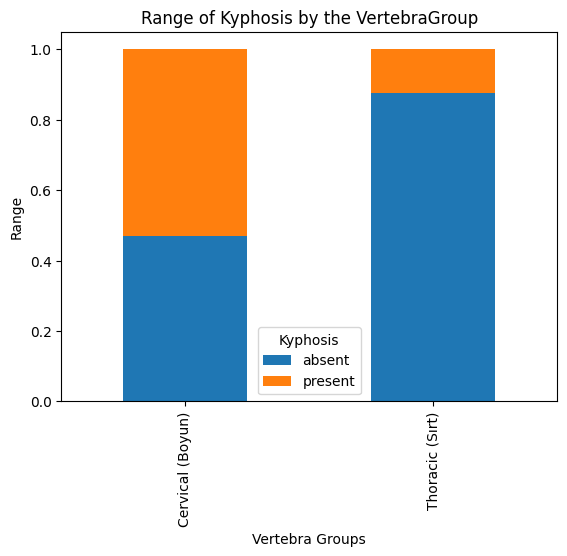

In [65]:
# Group and count the kyphosis conditions by vertebraGroup.
kyphosis_by_vertebra = df.groupby('VertebraGroup')['Kyphosis'].value_counts(normalize=True).unstack().fillna(0)

# Visualize Kyphosis Range
plt.figure(figsize=(12, 8))
kyphosis_by_vertebra.plot(kind='bar', stacked=True)
plt.title('Range of Kyphosis by the VertebraGroup')
plt.xlabel('Vertebra Groups')
plt.ylabel('Range')
plt.legend(title='Kyphosis')
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h4 align="left"><font color=dodgerblue> Group and count the kyphosis conditions by vertebraGroup :</font></h4>   
 

In this project, we will perform basic Exploratory Data Analysis (EDA) on the Kyphosis disease Dataset. Kyphosis is an abnormally excessive convex curvature of the spine, and the dataset provides information on children who have undergone corrective spinal surgery. 

Our main objectives are:
- To understand the distribution of kyphosis conditions across different vertebra groups.
- To visualize the range of kyphosis and recovery rates in the dataset.
- To identify potential patterns or insights that can inform further research or medical practices.


In [38]:
# Genel Start vertebra no ile ve Kyphosis tekrarlama durumunu gosteren grafik


# General plot showing the frequency of the Start vertebra number and Kyphosis recurrence status
kyphosis_by_vertebra = df.groupby('Start')['Kyphosis'].value_counts(normalize=True).unstack().fillna(0)

# Visualize Kyphosis Range
plt.figure(figsize=(12, 8))
kyphosis_by_vertebra.plot(kind='bar', stacked=True)
plt.title('Range of Kyphosis by the Vertebrea Numbers')
plt.xlabel('Start (Vertebrea Numbers)')
plt.ylabel('Oran')
plt.legend(title='Kyphosis')
plt.show()


NameError: name 'df' is not defined

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h4 align="left"><font color=dodgerblue> Plot showing the frequency of the Start vertebra number:</font></h4>   
 

    
  ! **Health and Treatment Insights**: This chart can inform healthcare professionals about which specific vertebra numbers require more careful monitoring for kyphosis, aiding in the shaping of treatment strategies.

    


In [66]:
# Convert the age column datatype from int64 to float64

# Yaş sütununun veri tipini int64'ten float64'e dönüştürelim
df['Age'] = df['Age'].astype('float64')

# Dönüşümü kontrol etmek için yaş sütununun veri tipini ve ilk birkaç satırı görüntüleyelim
print(df.dtypes)
print(df.head())

Kyphosis                 object
Age                     float64
Number                    int64
Start                     int64
Age_in_years            float64
VertebraGroup            object
VertebraGroupNumbers      int64
dtype: object
  Kyphosis    Age  Number  Start  Age_in_years     VertebraGroup  \
0   absent   71.0       3      5      5.916667  Cervical (Boyun)   
1   absent  158.0       3     14     13.166667   Thoracic (Sırt)   
2  present  128.0       4      5     10.666667  Cervical (Boyun)   
3   absent    2.0       5      1      0.166667  Cervical (Boyun)   
4   absent    1.0       4     15      0.083333   Thoracic (Sırt)   

   VertebraGroupNumbers  
0                     1  
1                     2  
2                     1  
3                     1  
4                     2  


In [67]:
# Define a function that converts age from months to years
# Apply the function to the “Age” column and add the results into a new column entitled “Age in Years”

# Yaşı aylardan yıllara dönüştüren fonksiyonu tanımlayalım
def convert_age_months_to_years(age_in_months):
    """Convert age from months to years."""
    age_in_years = age_in_months / 12
    return age_in_years

# Age sütununu dönüştürelim
df['Age_in_years'] = df['Age'].apply(convert_age_months_to_years)

# İlk birkaç satırı ve veri tiplerini kontrol edelim
print(df[['Age', 'Age_in_years']].head())
print(df.dtypes)

     Age  Age_in_years
0   71.0      5.916667
1  158.0     13.166667
2  128.0     10.666667
3    2.0      0.166667
4    1.0      0.083333
Kyphosis                 object
Age                     float64
Number                    int64
Start                     int64
Age_in_years            float64
VertebraGroup            object
VertebraGroupNumbers      int64
dtype: object


In [68]:
df.head()

,Kyphosis,Age,Number,Start,Age_in_years,VertebraGroup,VertebraGroupNumbers
0,absent,71.0,3,5,5.916667,Cervical (Boyun),1
1,absent,158.0,3,14,13.166667,Thoracic (Sırt),2
2,present,128.0,4,5,10.666667,Cervical (Boyun),1
3,absent,2.0,5,1,0.166667,Cervical (Boyun),1
4,absent,1.0,4,15,0.083333,Thoracic (Sırt),2


In [79]:
# What are the features of the oldest and youngest child in this study?

# En küçük ve en büyük yaşları bulalım
min_age = df['Age'].min()
max_age = df['Age'].max()

# Bu yaşlara sahip çocukların özelliklerini görüntüleyelim
youngest_child = df[df['Age'] == min_age]
oldest_child = df[df['Age'] == max_age]

In [80]:

print("Youngest child features:")
youngest_child

Youngest child features:


,Kyphosis,Age,Number,Start,Age_in_years,VertebraGroup,VertebraGroupNumbers
4,absent,1.0,4,15,0.083333,Thoracic (Sırt),2
5,absent,1.0,2,16,0.083333,Thoracic (Sırt),2
13,absent,1.0,4,12,0.083333,Thoracic (Sırt),2
15,absent,1.0,3,16,0.083333,Thoracic (Sırt),2
36,absent,1.0,3,9,0.083333,Thoracic (Sırt),2


In [81]:
print("\nOldest child features:")
oldest_child


Oldest child features:


,Kyphosis,Age,Number,Start,Age_in_years,VertebraGroup,VertebraGroupNumbers
73,absent,206.0,4,10,17.166667,Thoracic (Sırt),2


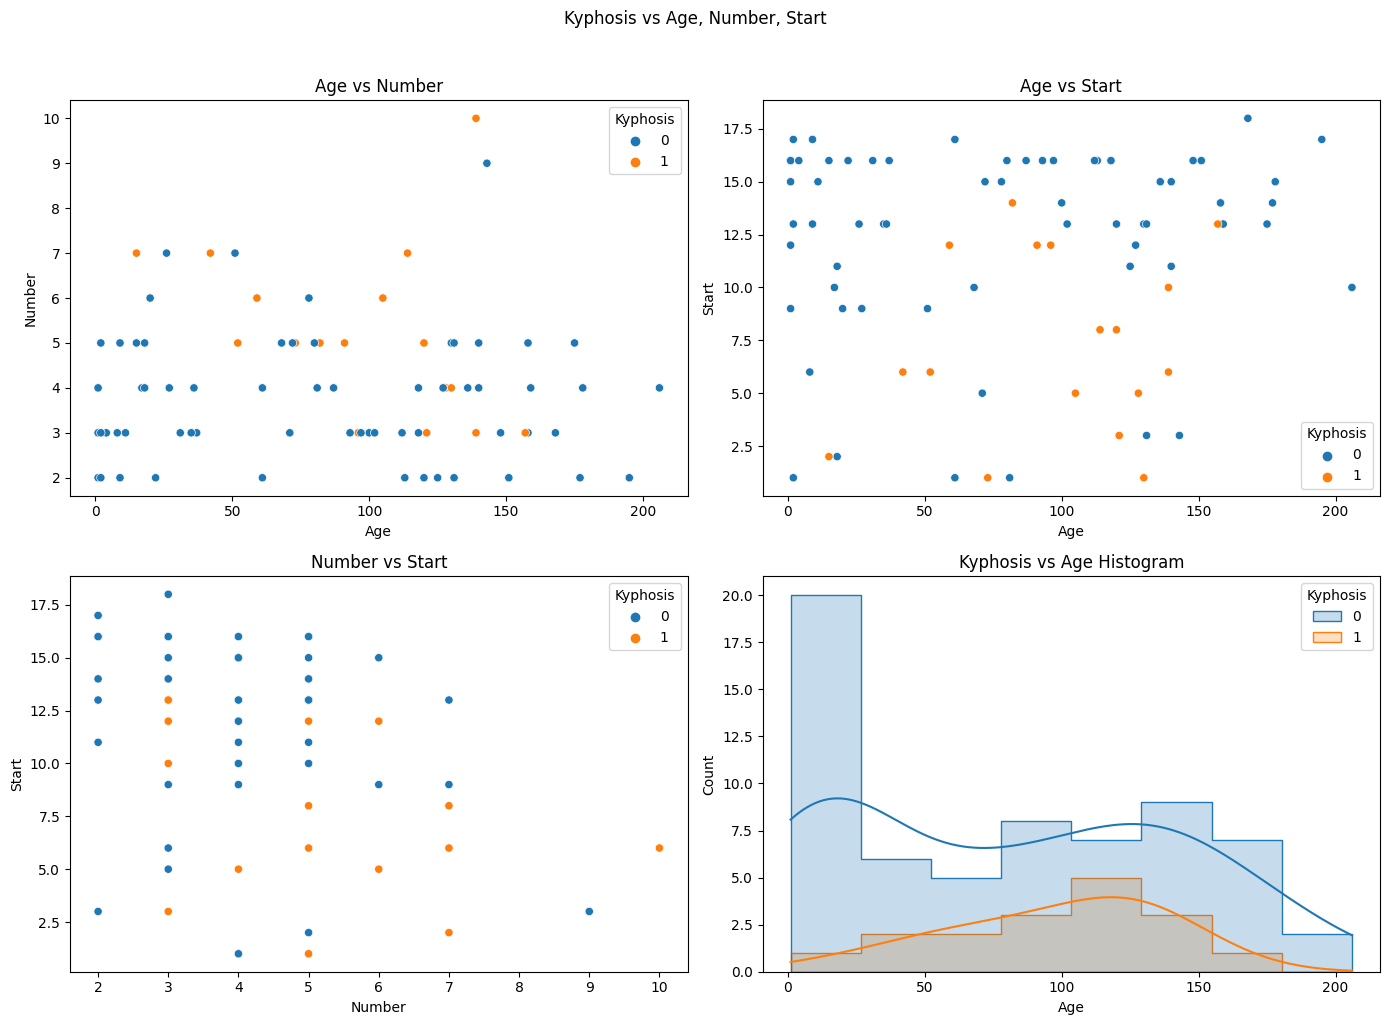

In [82]:
# İlgili sütunları seçelim ve 'Kyphosis' sütununu binary değere dönüştürelim
df['Kyphosis'] = df['Kyphosis'].apply(lambda x: 1 if x == 'present' else 0)

# İlişkili değişkenleri seçelim
variables = ['Age', 'Number', 'Start']

# Grafik düzenini belirleyelim (2x2 düzeninde)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatterplot - Age vs Number
sns.scatterplot(x='Age', y='Number', hue='Kyphosis', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Number')

# Scatterplot - Age vs Start
sns.scatterplot(x='Age', y='Start', hue='Kyphosis', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Start')

# Scatterplot - Number vs Start
sns.scatterplot(x='Number', y='Start', hue='Kyphosis', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Number vs Start')

# Pairplot diyagonal histogramlar için - Kyphosis'e göre Age histogramı
sns.histplot(df, x='Age', hue='Kyphosis', element='step', ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Kyphosis vs Age Histogram')

# Genel başlık
fig.suptitle('Kyphosis vs Age, Number, Start', y=1.02)
plt.tight_layout()
plt.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Scatterplot </font>  
 
    
    
  The code snippet above creates various visualizations to examine the relationship of Kyphosis disease with specific features (age, number of vertebrae, and starting vertebra number). These visualizations help to more clearly see the relationships between different features after converting the Kyphosis condition into a binary value.




In [30]:
# Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check.
# Normalization is conducted on the 'Age' column to make feature values range from 0 to 1.

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Yaş sütununu seçelim
age_data = df[['Age']]

# Standardizasyon işlemi
scaler_standard = StandardScaler()
df['Age_standardized'] = scaler_standard.fit_transform(age_data)

# Normalizasyon işlemi
scaler_minmax = MinMaxScaler()
df['Age_normalized'] = scaler_minmax.fit_transform(age_data)

# İlk birkaç satırı kontrol edelim
print(df[['Age', 'Age_standardized', 'Age_normalized']].head())

# Sanity check - Standardizasyonun ortalaması 0 ve standart sapması 1 olmalı
mean_standardized = df['Age_standardized'].mean()
std_standardized = df['Age_standardized'].std()

# Sanity check - Normalizasyonun minimumu 0 ve maksimumu 1 olmalı
min_normalized = df['Age_normalized'].min()
max_normalized = df['Age_normalized'].max()

print(f"\nStandardized Age - Mean: {mean_standardized:.2f}, Std Dev: {std_standardized:.2f}")
print(f"Normalized Age - Min: {min_normalized:.2f}, Max: {max_normalized:.2f}")



     Age  Age_standardized  Age_normalized
0   71.0         -0.219143        0.341463
1  158.0          1.287494        0.765854
2  128.0          0.767964        0.619512
3    2.0         -1.414063        0.004878
4    1.0         -1.431381        0.000000

Standardized Age - Mean: 0.00, Std Dev: 1.01
Normalized Age - Min: 0.00, Max: 1.00


In [39]:
df.head(10)

,Kyphosis,Age,Number,Start,Age_in_years,Age_standardized,Age_normalized
0,absent,71.0,3,5,5.916667,-0.219143,0.341463
1,absent,158.0,3,14,13.166667,1.287494,0.765854
2,present,128.0,4,5,10.666667,0.767964,0.619512
3,absent,2.0,5,1,0.166667,-1.414063,0.004878
4,absent,1.0,4,15,0.083333,-1.431381,0.000000
5,absent,1.0,2,16,0.083333,-1.431381,0.000000
6,absent,61.0,2,17,5.083333,-0.392320,0.292683
7,absent,37.0,3,16,3.083333,-0.807944,0.175610
8,absent,113.0,2,16,9.416667,0.508199,0.546341
9,present,59.0,6,12,4.916667,-0.426956,0.282927


##  <font color=#2865c8> <b> FEATURE RELATIONSHIPS </b><font color='black'> 
Hint: 
- Histogram, KDE
- Scatterplot
- Heatmap Correlation
- Analysis of the graphs

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h4 align="left"><font color=dodgerblue> Heatmap:</font></h4>  

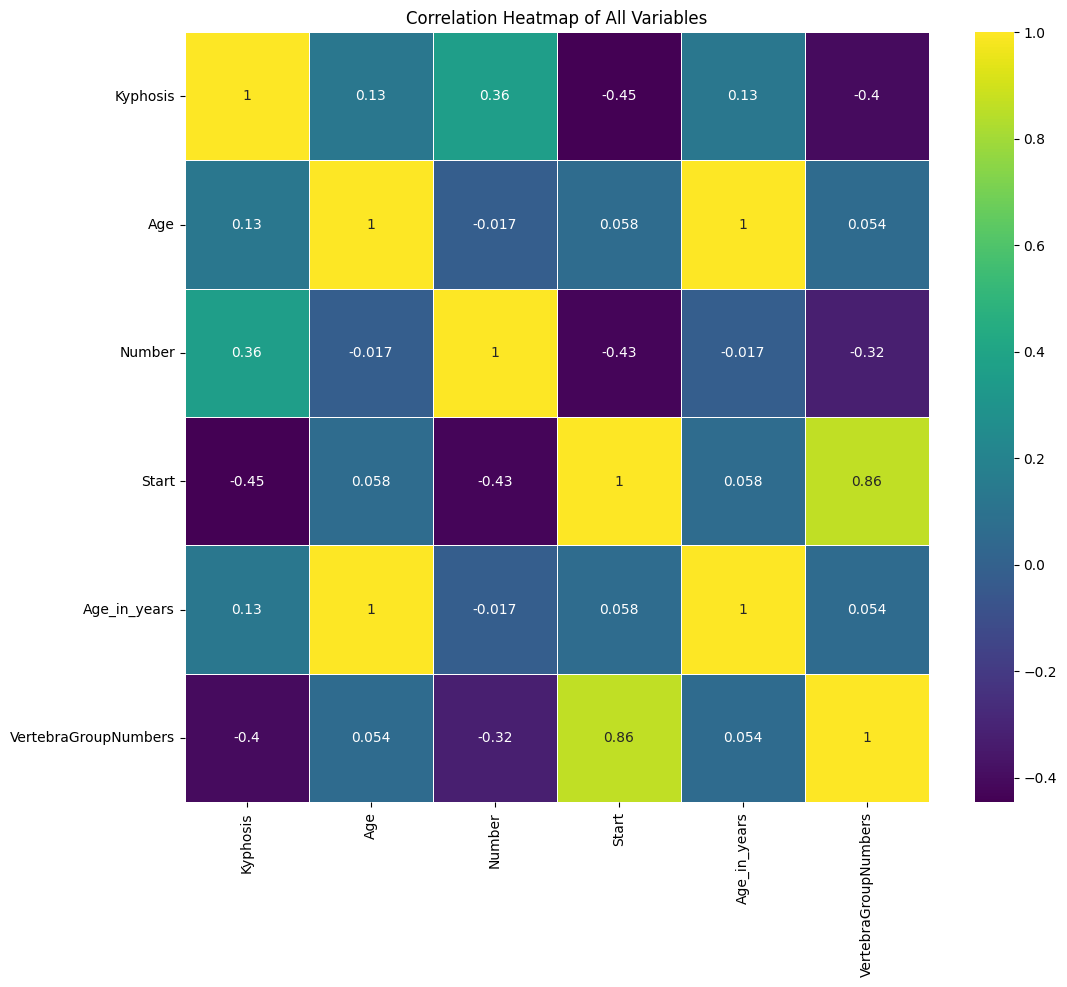

In [84]:
#HeatMap: Correlation matrix
correlation_matrix = df.corr()

# Create a HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of All Variables')
plt.show()



 color=dodgerblue> Heatmap:</font></h4>   
 

    
    
    
**Correlation Matrix Graph**
    
    
In the graph, we see the correlation coefficients between the columns “Age”, “Flumber” and “Start”.
Correlation between Age and Number (number of vertebrae):
    The correlation coefficient is -0.02. This means that there is almost no correlation between age and the number of vertebrae operated on.
    
**Correlation between Age and Start:**
    
The correlation coefficient is 0.06. This indicates that there is a very weak positive correlation between age and the number of vertebrae where the surgery started.
    
**Correlation between Number (number of vertebrae) and Start (starting vertebra):**
    
The correlation coefficient is -0.41. This indicates that there is a moderate negative correlation between the number of vertebrae operated on and the number of vertebrae where the surgery started. That is, as the number of vertebrae operated on increases, the number of vertebrae where the surgery started tends to decrease.


    
    
   **Conclusion**
    
    
**If we look at the general results of the correlation matrix**:
The variable “Age” has weak correlations with the variables “Number” and “Start”. This indicates that age has no significant effect on the number of vertebrae operated on or the number of vertebrae on which the surgery started.
There is a moderate negative correlation between “Number” and “Start”. This indicates that as the number of vertebrae operated on increases, the surgery starts at lower levels.
This correlation analysis helps us to understand the basic relationships between variables and provides a basis for further analysis. For example, we can look deeper into how these variables interact to predict the presence of kyphosis after surgery.


    
    
    

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h4 align="left"><font color=dodgerblue> Pairplot:</font></h4>   

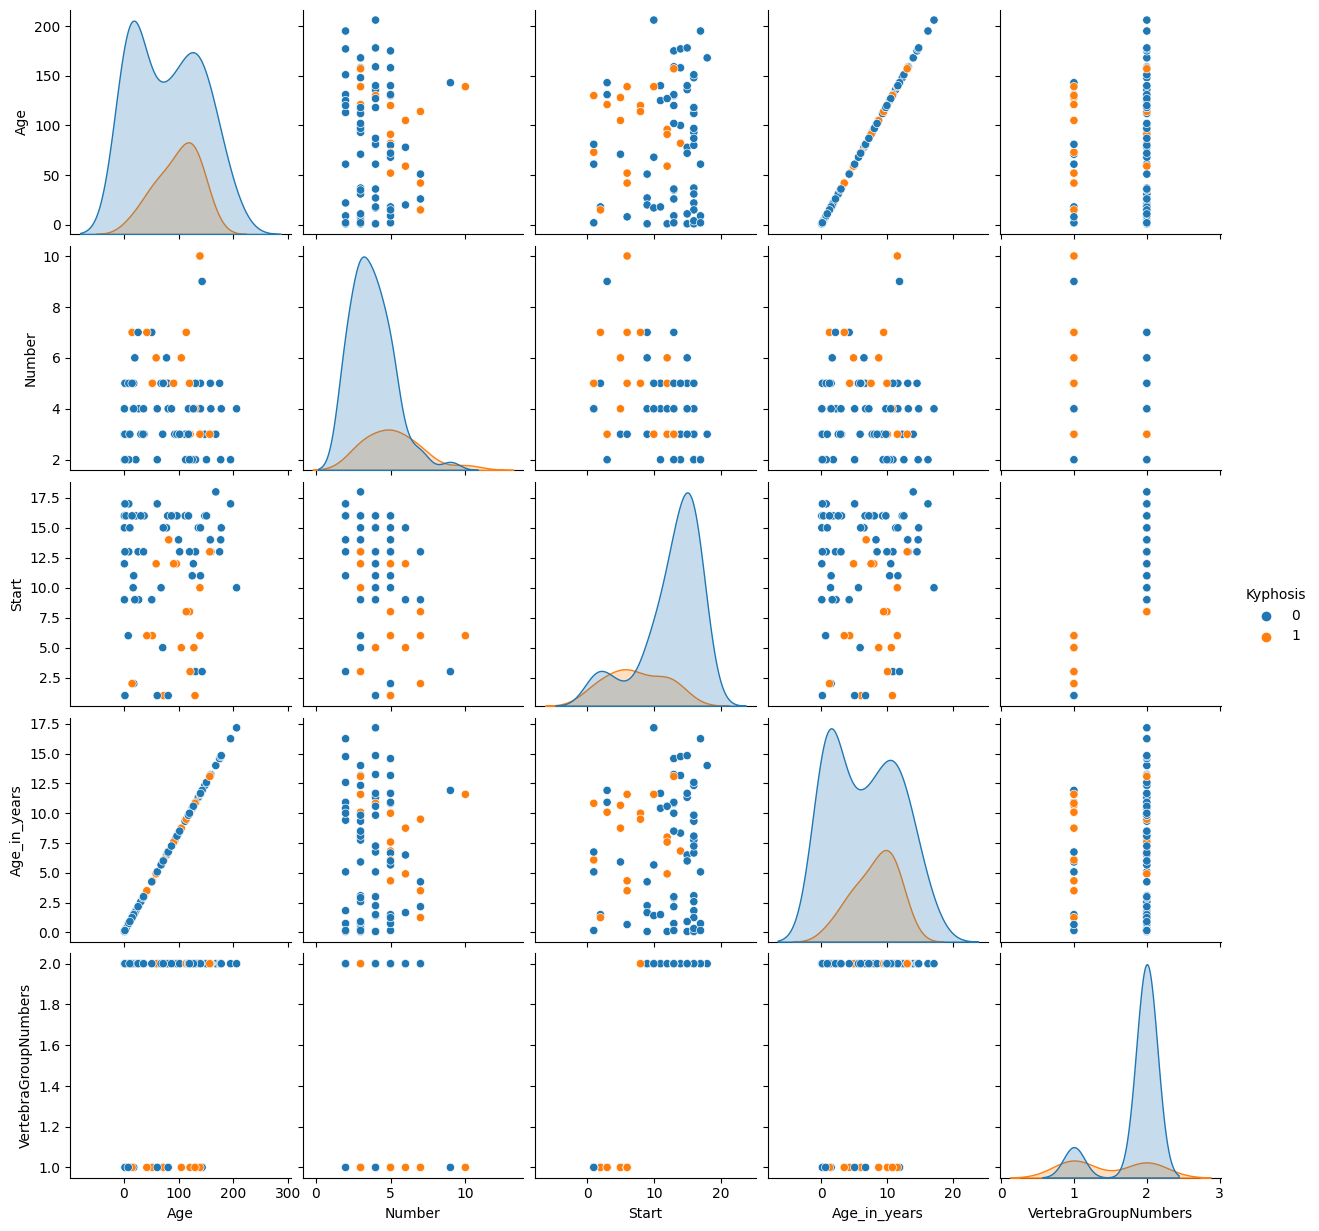

In [83]:
# Kyphosis'in varlığı ile diğer değişkenler arasındaki ilişkileri incele
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="Kyphosis")
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
|
<h4 align="left"><font color=dodgerblue> Subplots:</font></h4>   

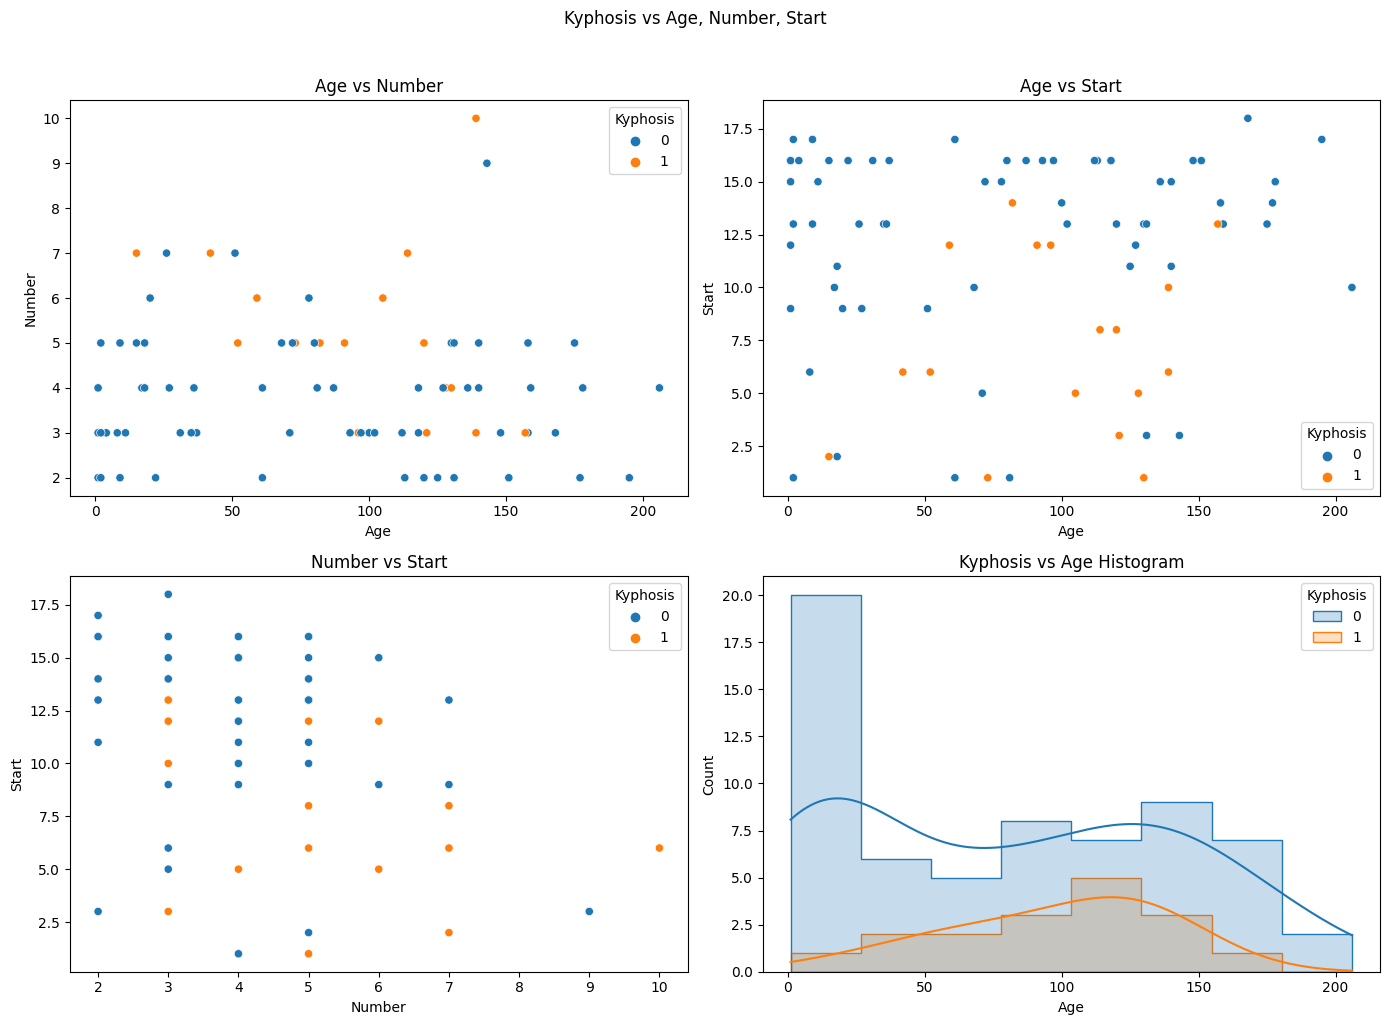

In [15]:
# İlgili sütunları seçelim ve 'Kyphosis' sütununu binary değere dönüştürelim
df['Kyphosis'] = df['Kyphosis'].apply(lambda x: 1 if x == 'present' else 0)

# İlişkili değişkenleri seçelim
variables = ['Age', 'Number', 'Start']

# Grafik düzenini belirleyelim (2x2 düzeninde)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatterplot - Age vs Number
sns.scatterplot(x='Age', y='Number', hue='Kyphosis', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Number')

# Scatterplot - Age vs Start
sns.scatterplot(x='Age', y='Start', hue='Kyphosis', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Start')

# Scatterplot - Number vs Start
sns.scatterplot(x='Number', y='Start', hue='Kyphosis', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Number vs Start')

# Pairplot diyagonal histogramlar için - Kyphosis'e göre Age histogramı
sns.histplot(df, x='Age', hue='Kyphosis', element='step', ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Kyphosis vs Age Histogram')

# Genel başlık
fig.suptitle('Kyphosis vs Age, Number, Start', y=1.02)
plt.tight_layout()
plt.show()


 

    
    
**1. Scatterplot - Age vs Number**
In this graph, we examine the relationship between age (Age) and number of vertebrae (Number) according to the presence (1) or absence (0) of Kyphosis. The colors represent the presence (1) or absence (0) of Kyphosis.

**Conclusions:**

We can observe whether the presence or absence of Kyphosis shows a clear relationship between age and number of vertebrae.
If the colors cluster at a certain age or number of vertebrae, we can assume that this age or number of vertebrae is associated with Kyphosis.
2. Scatterplot - Age vs Start
In this graph, we examine the relationship between age and initial vertebra (Start) according to the presence of Kyphosis.

**Conclusions**

We can observe whether there is a clear relationship between age and starting vertebrae.
We can determine whether Kyphosis is more prevalent in a given starting vertebra and age range.
3. Scatterplot - Number vs Start
In this graph, we analyze the relationship between the number of vertebrae (Number) and the starting vertebra (Start) according to the presence of Kyphosis.

**Conclusions**

We can observe whether there is a clear relationship between the number of vertebrae and the starting vertebrae.
We can determine whether certain combinations of number of vertebrae and starting vertebrae are associated with Kyphosis.
4. Histogram - Kyphosis vs Age
This histogram shows the age distribution according to the presence of Kyphosis.

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h4 align="left"><font color=dodgerblue> Boxplot:</font></h4>   

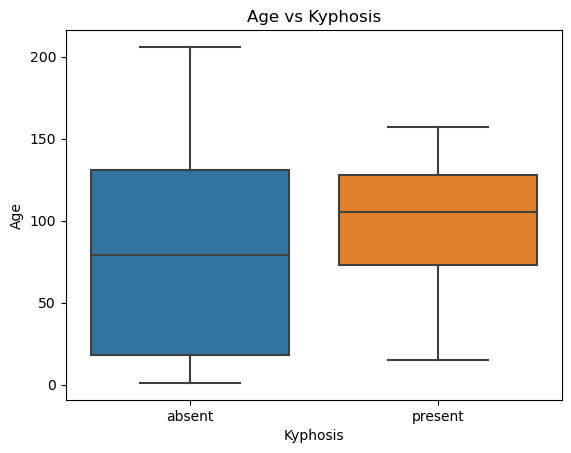

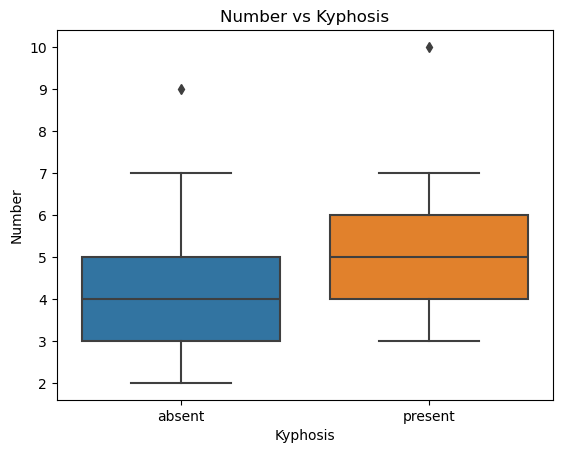

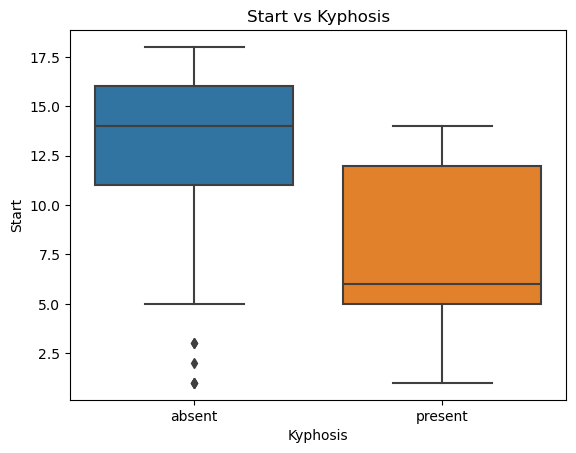

In [35]:
# Kyphosis'in varlığı ve yokluğu durumunda yaş, omur sayısı ve başlangıç omuru değerlerini karşılaştır
df.groupby('Kyphosis').agg({
    'Age': ['mean', 'min', 'max'],
    'Number': ['mean', 'min', 'max'],
    'Start': ['mean', 'min', 'max']
})

# Kyphosis'in varlığına göre kutu grafikleri
sns.boxplot(x='Kyphosis', y='Age', data=df)
plt.title('Age vs Kyphosis')
plt.show()

sns.boxplot(x='Kyphosis', y='Number', data=df)
plt.title('Number vs Kyphosis')
plt.show()

sns.boxplot(x='Kyphosis', y='Start', data=df)
plt.title('Start vs Kyphosis')
plt.show()


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<font color=dodgerblue> 💡 Output: Boxplot:</font>  
 
-**Differences in Characteristics:** To find out how characteristics such as age, number of vertebrae and initial vertebrae differ between groups with and without kyphosis.
Effect of Characteristics: To understand the effect of age, number of vertebrae and starting vertebrae on the presence of Kyphosis disease.

-**Data Distribution:** To visually examine data distributions with box plots and identify possible anomalies or significant differences.
These analyses are used to determine which characteristics are more associated with Kyphosis and to make more in-depth inferences based on these associations.



<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:dodgerblue;letter-spacing:1px;overflow:hidden"><b> Thank you</b></div>

<p style="text-align: center"><font color='Magenta'> <b>DS-4</b><font color='black'><p>
    
<p style="text-align: center;"><font color='dodgerblue'> <b>Data Analytics Final Project  | May 2024</b><font color='orange'><p>
